## PYTHON JOURNEY MACHINE & DEEP LEARNING
### Trabalho prático usando Python
 
### Principal Component Analysis  (PCA)
### Dimensionality Reduction

### Exemplo de aplicação da técnica de PCA

#### Objetivo: Criar uma segmentação de países utilizando os recordes femininos da modalidade esportiva de corridas. Para o desenvolvimento do modelo será utilizada uma base disponível no site da universidade de Wisconsin através do endereço: http://www.stat.wisc.edu/~rich/JWMULT06dat/T1-9.dat.

#### Nesta base temos os recordes femininos internacionais, referência 2005, das seguintes modalidades: 100 metros em segundos, 200 metros em segundos, 400 metros em segundos, 800 metros em minutos, 1.500 metros em minutos, 3.000 metros em minutos e maratona em minutos.

#### Dicionário de variáveis

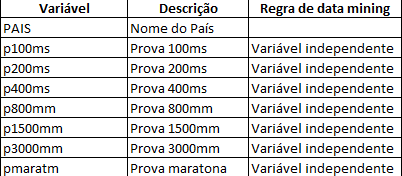

In [1]:
# Importar as bibliotecas
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
# Importar os dados
df = pd.read_csv('Base_Paises.csv', ';')

In [3]:
df.head()

,PAIS,p100ms,p200ms,p400ms,p800mm,p1500mm,p3000mm,pmaratm
0,ARG,11.57,22.94,52.50,2.05,4.25,9.19,150.32
1,AUS,11.12,22.23,48.63,1.98,4.02,8.63,143.51
2,AUT,11.15,22.70,50.62,1.94,4.05,8.78,154.35
3,BEL,11.14,22.48,51.45,1.97,4.08,8.82,143.05
4,BER,11.46,23.05,53.30,2.07,4.29,9.81,174.18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PAIS     54 non-null     object 
 1   p100ms   54 non-null     float64
 2   p200ms   54 non-null     float64
 3   p400ms   54 non-null     float64
 4   p800mm   54 non-null     float64
 5   p1500mm  54 non-null     float64
 6   p3000mm  54 non-null     float64
 7   pmaratm  54 non-null     float64
dtypes: float64(7), object(1)
memory usage: 3.5+ KB


In [5]:
df.isna().sum()

PAIS       0
p100ms     0
p200ms     0
p400ms     0
p800mm     0
p1500mm    0
p3000mm    0
pmaratm    0
dtype: int64

In [7]:
df.describe().round(2)

,p100ms,p200ms,p400ms,p800mm,p1500mm,p3000mm,pmaratm
count,54.00,54.00,54.00,54.00,54.00,54.00,54.00
mean,11.36,23.12,51.99,2.02,4.19,9.08,153.62
std,0.39,0.93,2.60,0.09,0.27,0.82,16.44
min,10.49,21.34,47.60,1.89,3.84,8.10,135.25
25%,11.12,22.57,49.97,1.97,4.00,8.54,143.48
50%,11.32,22.98,51.64,2.00,4.10,8.84,148.43
75%,11.57,23.61,53.12,2.07,4.34,9.32,157.66
max,12.52,25.91,61.65,2.29,5.42,13.12,221.14


In [8]:
# Selecionar as variáveis quantitativas
var_num = ['p100ms','p200ms','p400ms','p800mm', 'p1500mm','p3000mm','pmaratm']

In [9]:
# Matriz de Correlação de Pearson
df[var_num].corr(method='pearson')

,p100ms,p200ms,p400ms,p800mm,p1500mm,p3000mm,pmaratm
p100ms,1.000000,0.941089,0.870780,0.809176,0.781551,0.727878,0.668960
p200ms,0.941089,1.000000,0.908810,0.819826,0.801328,0.731855,0.679954
p400ms,0.870780,0.908810,1.000000,0.805790,0.719800,0.673799,0.676938
p800mm,0.809176,0.819826,0.805790,1.000000,0.905051,0.866573,0.853990
p1500mm,0.781551,0.801328,0.719800,0.905051,1.000000,0.973380,0.790557
p3000mm,0.727878,0.731855,0.673799,0.866573,0.973380,1.000000,0.798730
pmaratm,0.668960,0.679954,0.676938,0.853990,0.790557,0.798730,1.000000


<AxesSubplot:>

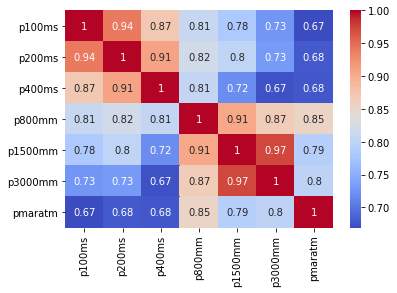

In [10]:
# Matriz de correlação
sns.heatmap(df[var_num].corr(), cmap='coolwarm', annot = True)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[var_num])

StandardScaler()

In [17]:
scaled_df = scaler.transform(df[var_num])

In [18]:
print(scaled_df)

[[ 5.43553243e-01 -1.93961081e-01  1.98568876e-01  3.20602150e-01
   2.24420025e-01  1.35264999e-01 -2.02570569e-01]
 [-6.09007298e-01 -9.65378910e-01 -1.30548780e+00 -4.92737532e-01
  -6.27964291e-01 -5.58025436e-01 -6.20696416e-01]
 [-5.32169929e-01 -4.54722038e-01 -5.32083979e-01 -9.57503065e-01
  -5.16783728e-01 -3.72322641e-01  4.48666067e-02]
 [-5.57782385e-01 -6.93752914e-01 -2.09508517e-01 -6.08928915e-01
  -4.05603165e-01 -3.22801895e-01 -6.48939866e-01]
 [ 2.61816222e-01 -7.44456433e-02  5.09484984e-01  5.52984916e-01
   3.72660776e-01  9.02836551e-01  1.26240487e+00]
 [-4.80945016e-01 -5.63372436e-01 -5.32083979e-01 -6.08928915e-01
  -7.20614760e-02 -5.04377962e-02 -3.81241085e-01]
 [-9.67581689e-01 -5.41642356e-01 -8.08022025e-01 -6.08928915e-01
  -7.02084666e-01 -6.69447113e-01 -3.22912222e-01]
 [ 7.48452895e-01  7.83892504e-01  6.57170136e-01 -2.60354766e-01
   1.13239462e-01  2.21926303e-01 -8.52988554e-02]
 [-1.45421836e+00 -1.20440979e+00 -8.46886539e-01 -1.07369445e+0

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA(n_components=2)

In [21]:
pca.fit(scaled_df)

PCA(n_components=2)

In [22]:
x_pca = pca.transform(scaled_df)

In [23]:
scaled_df.shape

(54, 7)

In [ ]:
x_pca.shape

In [ ]:
pca.components_